# 10章 時系列データ

In [1]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))

In [2]:
%matplotlib inline

## 10.1 日付、時間のデータ型とツール

In [3]:
from datetime import datetime

In [4]:
now = datetime.now()
now

datetime.datetime(2015, 6, 19, 7, 9, 0, 142384)

In [5]:
now.year, now.month, now.day

(2015, 6, 19)

In [6]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [7]:
delta

datetime.timedelta(926, 56700)

In [8]:
delta.days

926

In [9]:
from datetime import timedelta

In [10]:
start = datetime(2011, 1,7)

In [11]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [13]:
start - 2 * timedelta(3)

datetime.datetime(2011, 1, 1, 0, 0)

### 10.1.1 文字列とdatetimeの変換

In [14]:
stamp = datetime(2011, 1, 3)

In [15]:
str(stamp)

'2011-01-03 00:00:00'

In [16]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [19]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [23]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [24]:
datestrs = ['7/6/2011', '8/6/2011']
datestrs

['7/6/2011', '8/6/2011']

In [25]:
pd.to_datetime(datestrs)

<class 'pandas.tseries.index.DatetimeIndex'>
[2011-07-06, 2011-08-06]
Length: 2, Freq: None, Timezone: None

In [26]:
idx = pd.to_datetime(datestrs + [None])
idx

<class 'pandas.tseries.index.DatetimeIndex'>
[2011-07-06, ..., NaT]
Length: 3, Freq: None, Timezone: None

In [27]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

## 10.2 時系列の基本

In [28]:
from datetime import datetime

In [29]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.668130
2011-01-05   -1.220172
2011-01-07    0.646832
2011-01-08    0.000559
2011-01-10   -1.787052
2011-01-12   -0.235882
dtype: float64

In [30]:
ts + ts[::2]

2011-01-02    1.336260
2011-01-05         NaN
2011-01-07    1.293663
2011-01-08         NaN
2011-01-10   -3.574104
2011-01-12         NaN
dtype: float64

### 10.2.1 インデックス参照、データの選択、サブセットの抽出

In [31]:
stamp = ts.index[2]
stamp

Timestamp('2011-01-07 00:00:00')

In [32]:
ts[stamp]

0.64683164022759787

In [33]:
ts['2011/01/07']

0.64683164022759787

In [34]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    1.149593
2000-01-02    0.745578
2000-01-03   -0.216213
2000-01-04   -1.798942
2000-01-05   -0.399520
2000-01-06    0.407415
                ...   
2002-09-21    0.762499
2002-09-22    1.308017
2002-09-23   -1.231193
2002-09-24   -0.149616
2002-09-25   -0.165780
2002-09-26    0.108224
Freq: D, dtype: float64

In [35]:
longer_ts['2001-05']

2001-05-01    0.894089
2001-05-02    1.112682
2001-05-03    0.021749
2001-05-04   -1.484380
2001-05-05   -1.208313
2001-05-06    0.144809
                ...   
2001-05-26   -0.745390
2001-05-27    1.864789
2001-05-28    0.420176
2001-05-29   -0.787192
2001-05-30   -2.307837
2001-05-31    0.049762
Freq: D, dtype: float64

In [36]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.646832
2011-01-08    0.000559
2011-01-10   -1.787052
dtype: float64

In [37]:
ts.truncate(after='1/9/2011')

2011-01-02    0.668130
2011-01-05   -1.220172
2011-01-07    0.646832
2011-01-08    0.000559
dtype: float64

### 10.2.2 重複したインデックスを持つ時系列

In [39]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
                          '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [40]:
dup_ts.index.is_unique

False

In [42]:
grouped = dup_ts.groupby(level=0)

In [44]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 10.3 日付範囲、頻度、シフト

In [45]:
ts

2011-01-02    0.668130
2011-01-05   -1.220172
2011-01-07    0.646832
2011-01-08    0.000559
2011-01-10   -1.787052
2011-01-12   -0.235882
dtype: float64

In [46]:
ts.resample('D')

2011-01-02    0.668130
2011-01-03         NaN
2011-01-04         NaN
2011-01-05   -1.220172
2011-01-06         NaN
2011-01-07    0.646832
2011-01-08    0.000559
2011-01-09         NaN
2011-01-10   -1.787052
2011-01-11         NaN
2011-01-12   -0.235882
Freq: D, dtype: float64

### 10.3.1 日付範囲の生成

In [47]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

<class 'pandas.tseries.index.DatetimeIndex'>
[2012-04-01, ..., 2012-06-01]
Length: 62, Freq: D, Timezone: None

In [48]:
pd.date_range(start='4/1/2012', periods=20)

<class 'pandas.tseries.index.DatetimeIndex'>
[2012-04-01, ..., 2012-04-20]
Length: 20, Freq: D, Timezone: None

In [49]:
pd.date_range(end='4/1/2012', periods=20)

<class 'pandas.tseries.index.DatetimeIndex'>
[2012-03-13, ..., 2012-04-01]
Length: 20, Freq: D, Timezone: None

In [50]:
pd.date_range('5/2/2012 12:56:31', periods=5)

<class 'pandas.tseries.index.DatetimeIndex'>
[2012-05-02 12:56:31, ..., 2012-05-06 12:56:31]
Length: 5, Freq: D, Timezone: None

In [51]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

<class 'pandas.tseries.index.DatetimeIndex'>
[2012-05-02, ..., 2012-05-06]
Length: 5, Freq: D, Timezone: None

### 10.3.2 頻度と日付のオフセット

In [52]:
from pandas.tseries.offsets import Hour, Minute

In [53]:
hour = Hour()

In [55]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4H')

<class 'pandas.tseries.index.DatetimeIndex'>
[2000-01-01 00:00:00, ..., 2000-01-03 20:00:00]
Length: 18, Freq: 4H, Timezone: None

In [56]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

<class 'pandas.tseries.index.DatetimeIndex'>
[2000-01-01 00:00:00, ..., 2000-01-01 13:30:00]
Length: 10, Freq: 90T, Timezone: None

### 10.3.3 データの前方と後方へのシフト

In [57]:
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.333864
2000-02-29    1.066748
2000-03-31    0.034618
2000-04-30    1.718391
Freq: M, dtype: float64

In [58]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.333864
2000-04-30    1.066748
Freq: M, dtype: float64

In [59]:
ts / ts.shift(1) - 1

2000-01-31          NaN
2000-02-29    -4.195159
2000-03-31    -0.967548
2000-04-30    48.638834
Freq: M, dtype: float64

In [60]:
ts.shift(2, freq='M')

2000-03-31   -0.333864
2000-04-30    1.066748
2000-05-31    0.034618
2000-06-30    1.718391
Freq: M, dtype: float64

## 10.5 期間を使った算術演算

In [61]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [62]:
p+5

Period('2012', 'A-DEC')

In [63]:
rng = pd.period_range('1/1/2000', '6/3/2000', freq='M')
rng

<class 'pandas.tseries.period.PeriodIndex'>
[2000-01, ..., 2000-06]
Length: 6, Freq: M

In [64]:
Series(np.random.randn(6), index=rng)

2000-01   -0.142753
2000-02   -1.826931
2000-03   -1.316443
2000-04   -0.700395
2000-05   -0.141133
2000-06   -1.061940
Freq: M, dtype: float64

In [65]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(randn(3), index=rng)
pts = ts.to_period()
ts

2000-01-31    1.851236
2000-02-29    0.473307
2000-03-31    0.789566
Freq: M, dtype: float64

In [66]:
rng

<class 'pandas.tseries.index.DatetimeIndex'>
[2000-01-31, ..., 2000-03-31]
Length: 3, Freq: M, Timezone: None

In [67]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(randn(6), index=rng)
ts2

2000-01-29    1.071335
2000-01-30   -0.339449
2000-01-31   -0.736371
2000-02-01    0.902070
2000-02-02   -0.005441
2000-02-03    0.317845
Freq: D, dtype: float64

In [68]:
ts2.to_period('M')

2000-01    1.071335
2000-01   -0.339449
2000-01   -0.736371
2000-02    0.902070
2000-02   -0.005441
2000-02    0.317845
Freq: M, dtype: float64

In [74]:
pts = ts2.to_period()
pts

2000-01-29    1.071335
2000-01-30   -0.339449
2000-01-31   -0.736371
2000-02-01    0.902070
2000-02-02   -0.005441
2000-02-03    0.317845
Freq: D, dtype: float64

### 10.5.4 配列からPeriodIndexを作成する

In [76]:
data = pd.read_csv('pydata-book/ch08/macrodata.csv')
data.year

0      1959
1      1959
2      1959
3      1959
4      1960
5      1960
       ... 
197    2008
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, dtype: float64

In [77]:
data.quarter

0      1
1      2
2      3
3      4
4      1
5      2
      ..
197    2
198    3
199    4
200    1
201    2
202    3
Name: quarter, dtype: float64

In [80]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

<class 'pandas.tseries.period.PeriodIndex'>
[1959Q1, ..., 2009Q3]
Length: 203, Freq: Q-DEC

In [81]:
data.index = index

In [82]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
          ... 
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, dtype: float64

## 10.6 再サンプリングと頻度変換

In [83]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(randn(len(rng)), index=rng)
ts

2000-01-01    0.250991
2000-01-02   -0.625997
2000-01-03    1.182906
2000-01-04    0.353350
2000-01-05   -1.331201
2000-01-06    0.449574
                ...   
2000-04-04   -0.998265
2000-04-05   -0.278258
2000-04-06    0.216247
2000-04-07    0.980521
2000-04-08   -1.501676
2000-04-09   -0.081268
Freq: D, dtype: float64

In [84]:
ts.resample('M', how='mean')

2000-01-31    0.199789
2000-02-29   -0.145408
2000-03-31   -0.088238
2000-04-30   -0.372883
Freq: M, dtype: float64

### 10.6.1 ダウンサンプリング

In [85]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [86]:
ts.resample('5min', how='sum')

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [87]:
ts.resample('5min', how='sum', closed='left')

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [88]:
ts.resample('5min', how='sum', closed='right')

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [89]:
ts.resample('5min', how='sum', closed='left', label='left')

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [90]:
ts.resample('5min', how='ohlc', closed='left', label='left')

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### 10.6.2 アップサンプリングと穴埋め

In [91]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.346129,-1.887122,1.357988,0.465735
2000-01-12,-0.294791,0.211718,-0.033999,-0.703083


In [92]:
df_daily = frame.resample('D')

In [93]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.346129,-1.887122,1.357988,0.465735
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.294791,0.211718,-0.033999,-0.703083


In [95]:
df_daily = frame.resample('D', fill_method='ffill')
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.346129,-1.887122,1.357988,0.465735
2000-01-06,-0.346129,-1.887122,1.357988,0.465735
2000-01-07,-0.346129,-1.887122,1.357988,0.465735
2000-01-08,-0.346129,-1.887122,1.357988,0.465735
2000-01-09,-0.346129,-1.887122,1.357988,0.465735
2000-01-10,-0.346129,-1.887122,1.357988,0.465735
2000-01-11,-0.346129,-1.887122,1.357988,0.465735
2000-01-12,-0.294791,0.211718,-0.033999,-0.703083


### 期間で再サンプリングする

In [96]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.645496,-1.210481,-0.452283,1.218887
2000-02,-0.049886,0.236673,-0.352099,0.858005
2000-03,0.026792,-0.611384,-1.250887,0.610149
2000-04,-0.498055,1.368004,-1.332710,0.220038
2000-05,1.078132,2.507951,0.690111,1.588480


In [97]:
annual_frame = frame.resample('A-DEC', how='mean')
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.264887,-0.002922,-0.267859,0.40030
2001,0.158880,-0.061024,-0.255859,0.21222


In [98]:
annual_frame.resample('Q-DEC', fill_method='ffill')

,Colorado,Texas,New York,Ohio
2000Q1,-0.264887,-0.002922,-0.267859,0.40030
2000Q2,-0.264887,-0.002922,-0.267859,0.40030
2000Q3,-0.264887,-0.002922,-0.267859,0.40030
2000Q4,-0.264887,-0.002922,-0.267859,0.40030
2001Q1,0.158880,-0.061024,-0.255859,0.21222
2001Q2,0.158880,-0.061024,-0.255859,0.21222
2001Q3,0.158880,-0.061024,-0.255859,0.21222
2001Q4,0.158880,-0.061024,-0.255859,0.21222


## 10.7 時系列のプロット

In [99]:
close_px_all = pd.read_csv('pydata-book/ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B', fill_method='ffill')
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
...,...,...,...
2011-10-07,369.80,26.25,73.56
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27


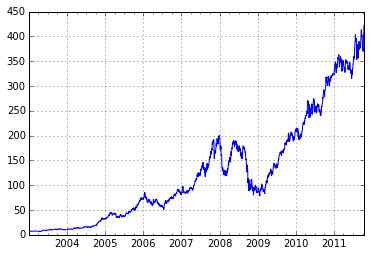

In [100]:
close_px['AAPL'].plot()

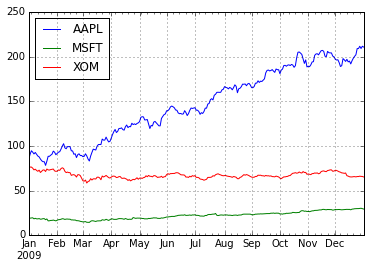

In [101]:
close_px['2009'].plot()

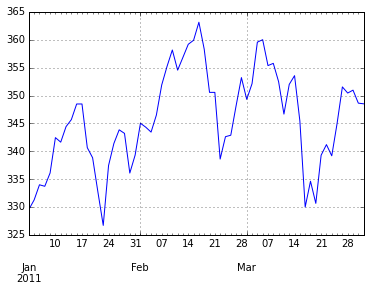

In [102]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

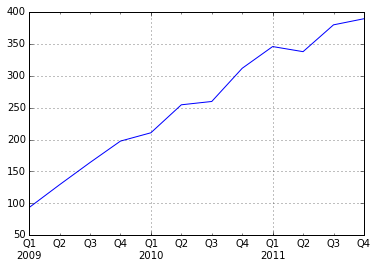

In [103]:
appl_q = close_px['AAPL'].resample('Q-DEC', fill_method='ffill')
appl_q.ix['2009':].plot()

## 10.8 移動する窓関数

In [104]:
close_px = close_px.asfreq('B').fillna(method='ffill')

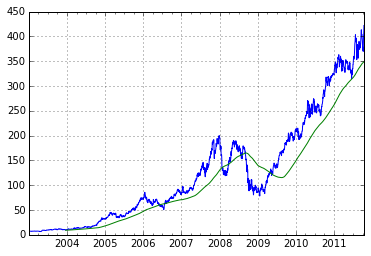

In [105]:
close_px.AAPL.plot()
pd.rolling_mean(close_px.AAPL, 250).plot()

In [106]:
appl_std250 = pd.rolling_std(close_px.AAPL, 250, min_periods=10)
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, dtype: float64

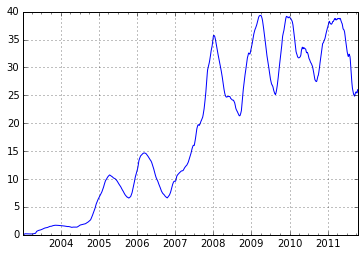

In [107]:
appl_std250.plot()

In [109]:
# 拡大する窓関数の定義
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)

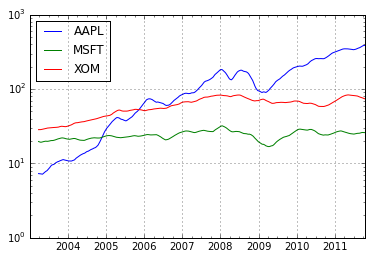

In [110]:
pd.rolling_mean(close_px, 60).plot(logy=True)

### 10.8.1 指数加重関数

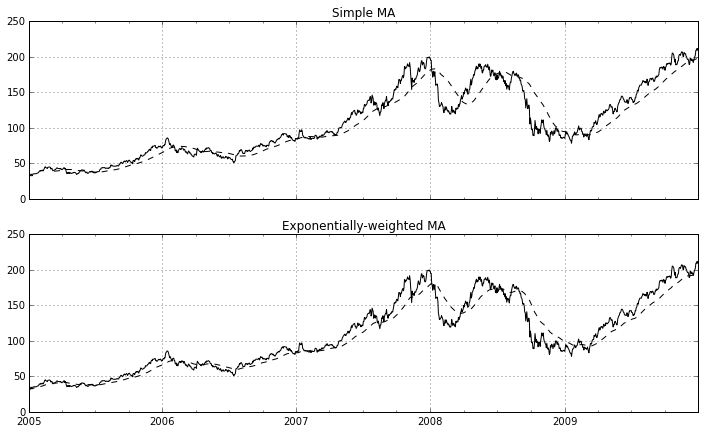

In [111]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))

aapl_px = close_px.AAPL['2005':'2009']

# 加重平均
ma60 = pd.rolling_mean(aapl_px, 60, min_periods=50)
# 指数加重平均
ewma60 = pd.ewma(aapl_px, span=60)

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

### 10.8.2 ２値の場合での移動する窓関数

In [112]:
spx_px = close_px_all['SPX']

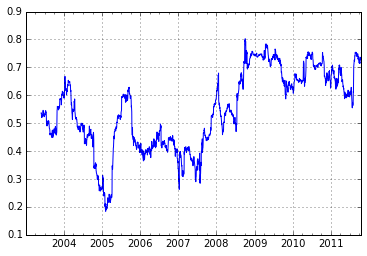

In [113]:
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_periods=100)
corr.plot()

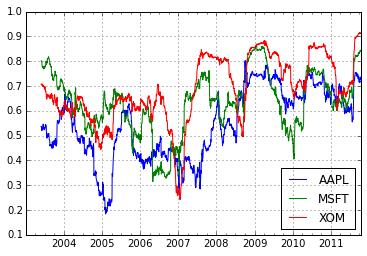

In [114]:
corr = pd.rolling_corr(returns, spx_rets, 125, min_periods=100)
corr.plot()

### 10.8.3 ユーザ定義の移動する窓関数

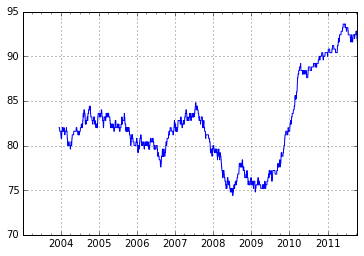

In [115]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = pd.rolling_apply(returns.AAPL, 250, score_at_2percent)
result.plot()